In [1]:
%matplotlib inline
#
from lrgsglib.shared import *
from lrgsglib.config.const import *
from lrgsglib.config.plotlib import inset_axes, restr_twilight
from lrgsglib.config.utils import read_files_to_2d_array
from lrgsglib.core import move_to_rootf, Lattice2D
from matplotlib.ticker import ScalarFormatter
#
move_to_rootf()
plt.style.use("ipynb/nb_plotsheet.mplstyle")
#
figpath = "data/plot/paper/suppinf/"
figsubpathstr = ['phtra']
paths = {str: f"{figpath}{str}/" for str in figsubpathstr}
for path in paths.values(): os.makedirs(path, exist_ok=True)
#
axvline_kwarg = dict(ls=':', color='k')
xlabelinset_kwargs = dict(labelpad=0, fontsize=18)
ylabelinset_kwargs = dict(rotation=90, labelpad=10, va="center",fontsize=18)
axins_tickparams_kwargs = dict(axis='both', which='major', size=7, width=1.25, labelsize=16)
axlegend_kwargs = dict(ncol=1, loc='lower left', fontsize=18)
kwargs_lines = dict(lw=5, marker='')
#
cmap = restr_twilight

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


## Phase transition ZERR/XERR

In [6]:
errtype = 'Xerr'

### Squared

In [7]:
sides = [16, 32, 64, 96]
geo = 'squared'
#
colors = cmap(np.linspace(0.0, 1, len(sides)))
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

File not found for L=96
File not found for L=96


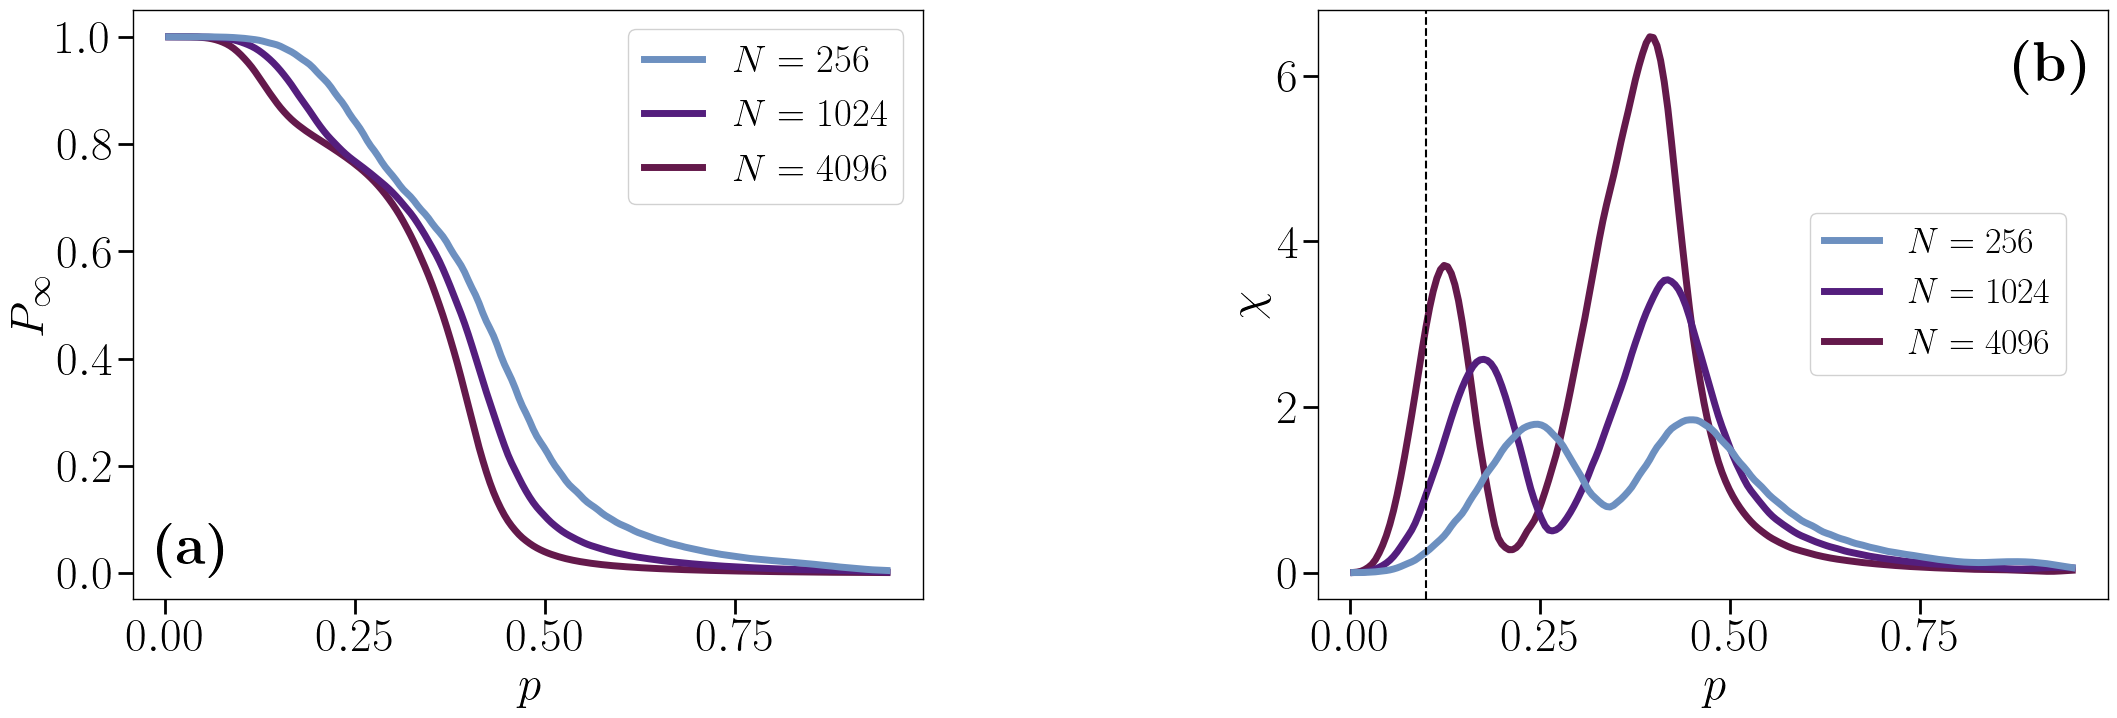

In [10]:
fig, ax = plt.subplots(figsize=(22, 8), ncols=2)

for cc, side in enumerate(sides):
    try:
        l = Lattice2D(side, geo, init_nw_dict=False, with_positions=False)
        fname = f"data/plot/paper/suppinf/data_pablo_tri-hex/OP_{errtype}_Squared_L{side}"
        data = np.loadtxt(fname, delimiter=',')
        p = data[:, 9]
        p_c = data[np.argmax(data[:, 1]), 9]
        S = gaussian_filter(data[:, 0], sigma=1)
        L = side
        # plt.plot(p, S, label=f'L={side}', lw=2)
        ax[0].plot(p, S, label=fr'$N={l.N}$', zorder=1/(cc+1), **kwargs_lines)
    except FileNotFoundError:
        print(f"File not found for L={side}")
#
# ax[0].axhline(0.5, ls='--', c='k')
#
ax[0].set_xlabel(r'$p$')
ax[0].set_ylabel(r'$P_{\infty}$')
#
ax[0].text(0.03, 0.06, r'\textbf{(a)}', transform=ax[0].transAxes, fontsize=40,
                 fontweight='bold', color='black')
ax[0].legend(fontsize=28)

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

for cc,side in enumerate(sides):
    try:
        l = Lattice2D(side, geo, init_nw_dict=False, with_positions=False)
        fname = f"data/plot/paper/suppinf/data_pablo_tri-hex/OP_{errtype}_Squared_L{side}"
        data = np.loadtxt(fname, delimiter=',')
        p = data[:, 9]
        p_c = data[np.argmax(data[:, 1]), 9]
        fS = gaussian_filter(data[:, 1], sigma=1)
        L = side
        # plt.plot(p, S, label=f'L={side}', lw=2)
        ax[1].plot(p, fS*L, label=fr'$N={l.N}$', zorder=1/(cc+1), **kwargs_lines)
    except FileNotFoundError:
        print(f"File not found for L={side}")
#
ax[1].axvline(0.10, ls='--', c='k')
#
# ax[1].set_yticks([])
formatter = ScalarFormatter(useMathText=True)  # Enable the use of math text in scientific notation
formatter.set_scientific(True)  # Enable scientific notation
formatter.set_powerlimits((-1,1))  # Set limits for switching to scientific notation
ax[1].yaxis.set_major_formatter(formatter)

ax[1].set_xlabel(r'$p$')
ax[1].set_ylabel(r'$\chi$')
#
ax[1].text(0.88, 0.88, r'\textbf{(b)}', transform=ax[1].transAxes, fontsize=40,
                 fontweight='bold', color='black', zorder=100000)
ax[1].legend(fontsize=26, bbox_to_anchor=(.6, .35))
fig.tight_layout()
fig.subplots_adjust(wspace=.5)  # 'wspace' controls the width of the space between subplots
#
fig.savefig(f"{paths['phtra']}suppli_both_{errtype}_{geo}.pdf", bbox_inches='tight',
            transparent=True)
# plt.close('all')

### Triangular

In [12]:
sides = [16, 32, 64, 96]
geo = 'tri'
#
colors = cmap(np.linspace(0.0, 1, len(sides)))
# Set these colors as the default color cycle
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

File not found for L=96
File not found for L=96


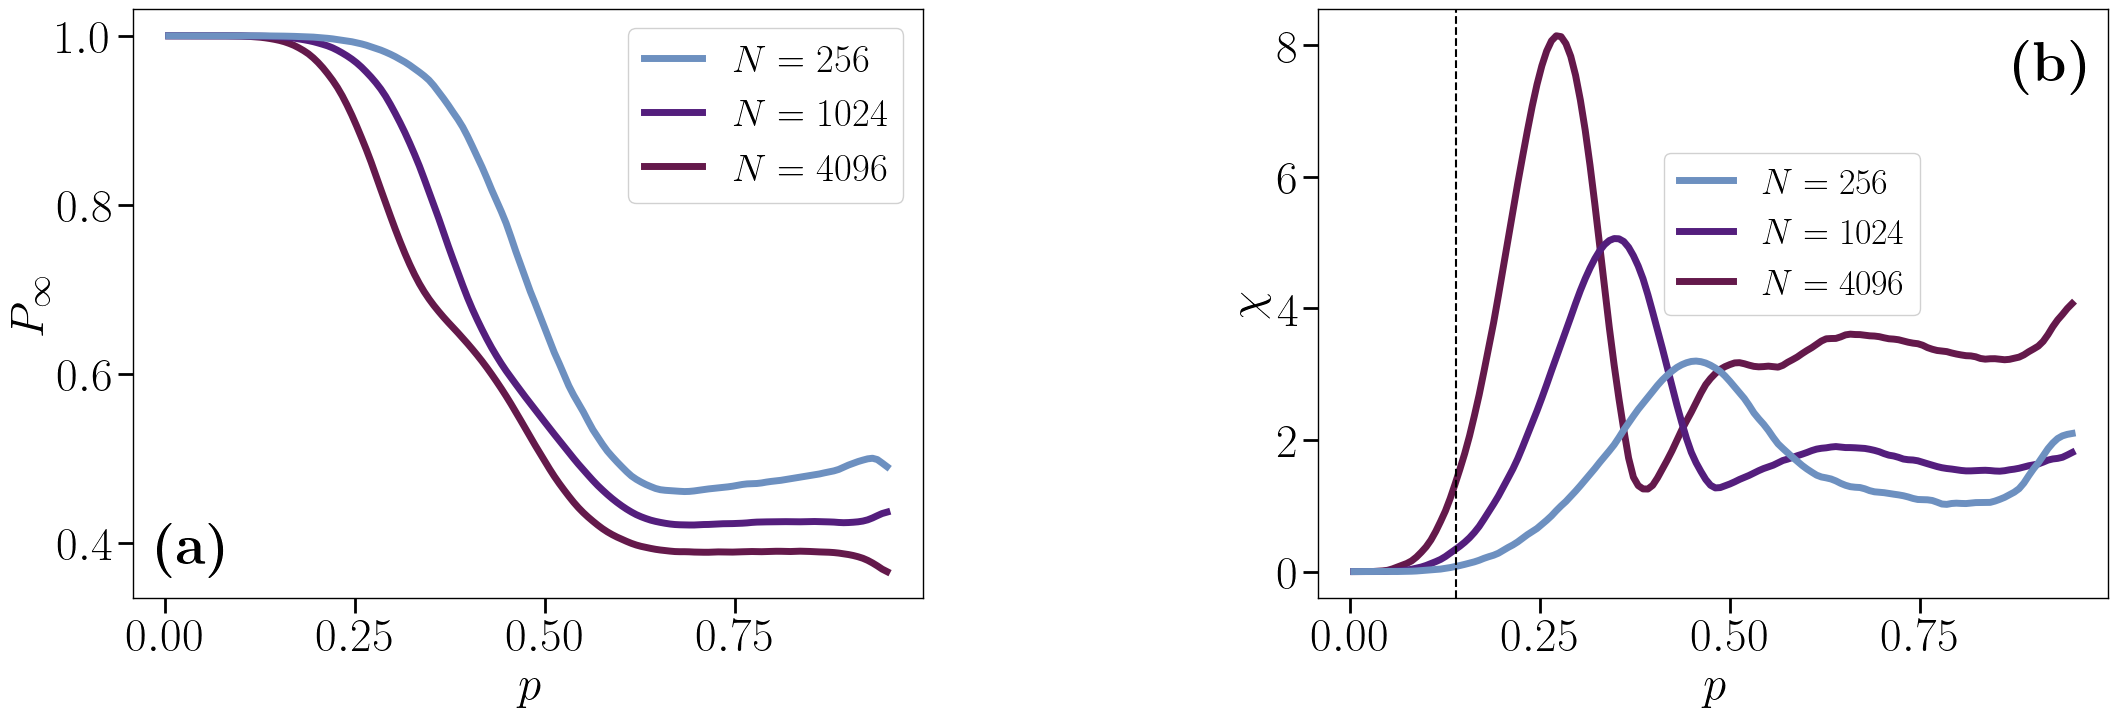

In [13]:
fig, ax = plt.subplots(figsize=(22, 8), ncols=2)

for cc, side in enumerate(sides):
    try:
        l = Lattice2D(side, geo, init_nw_dict=False, with_positions=False)
        fname = f"data/plot/paper/suppinf/data_pablo_tri-hex/OP_{errtype}_Tri_L{side}"
        data = np.loadtxt(fname, delimiter=',')
        p = data[:, 9]
        p_c = data[np.argmax(data[:, 1]), 9]
        S = gaussian_filter(data[:, 0], sigma=1)
        L = side
        # plt.plot(p, S, label=f'L={side}', lw=2)
        ax[0].plot(p, S, label=fr'$N={l.N}$', zorder=1/(cc+1), **kwargs_lines)
    except FileNotFoundError:
        print(f"File not found for L={side}")
#
# ax[0].axhline(0.5, ls='--', c='k')
#
ax[0].set_xlabel(r'$p$')
ax[0].set_ylabel(r'$P_{\infty}$')
#
ax[0].text(0.03, 0.06, r'\textbf{(a)}', transform=ax[0].transAxes, fontsize=40,
                 fontweight='bold', color='black')
ax[0].legend(fontsize=28)

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

for cc,side in enumerate(sides):
    try:
        l = Lattice2D(side, geo, init_nw_dict=False, with_positions=False)
        fname = f"data/plot/paper/suppinf/data_pablo_tri-hex/OP_{errtype}_Tri_L{side}"
        data = np.loadtxt(fname, delimiter=',')
        p = data[:, 9]
        p_c = data[np.argmax(data[:, 1]), 9]
        fS = gaussian_filter(data[:, 1], sigma=1)
        L = side
        # plt.plot(p, S, label=f'L={side}', lw=2)
        ax[1].plot(p, fS*L, label=fr'$N={l.N}$', zorder=1/(cc+1), **kwargs_lines)
    except FileNotFoundError:
        print(f"File not found for L={side}")
#
ax[1].axvline(0.14, ls='--', c='k')
#
# ax[1].set_yticks([])
formatter = ScalarFormatter(useMathText=True)  # Enable the use of math text in scientific notation
formatter.set_scientific(True)  # Enable scientific notation
formatter.set_powerlimits((-1,1))  # Set limits for switching to scientific notation
ax[1].yaxis.set_major_formatter(formatter)

ax[1].set_xlabel(r'$p$')
ax[1].set_ylabel(r'$\chi$')
#
ax[1].text(0.88, 0.88, r'\textbf{(b)}', transform=ax[1].transAxes, fontsize=40,
                 fontweight='bold', color='black', zorder=100000)
ax[1].legend(fontsize=26, bbox_to_anchor=(.6, .45))
fig.tight_layout()
fig.subplots_adjust(wspace=.5)  # 'wspace' controls the width of the space between subplots
#
fig.savefig(f"{paths['phtra']}suppli_both_{errtype}_{geo}.pdf", bbox_inches='tight',
            transparent=True)
# plt.close('all')

## Phase transition Tri/Hex

### Hex: Size of the giant Cluster $P_{\infty}$ and Fluctuations $\chi$

In [ ]:
sides = [16, 32, 64, 128, 256]
geo = 'hex'
kwargs_lines = dict(lw=5, marker='')
#
colors = cmap(np.linspace(0.0, 1, len(sides)))
# Set these colors as the default color cycle
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

In [ ]:
fig, ax = plt.subplots(figsize=(22, 8), ncols=2)

for cc, side in enumerate(sides):
    l = Lattice2D(side, geo, init_nw_dict=False, with_positions=False)
    fname = f"data/plot/paper/suppinf/data_pablo_tri-hex/OP_Hex_L{side}"
    data = np.loadtxt(fname, delimiter=',')
    p = data[:, 9]
    p_c = data[np.argmax(data[:, 1]), 9]
    S = gaussian_filter(data[:, 0], sigma=1)
    L = side
    # plt.plot(p, S, label=f'L={side}', lw=2)
    ax[0].plot(p, S, label=fr'$N={l.N}$', zorder=1/(cc+1), **kwargs_lines)
#
# ax[0].axhline(0.5, ls='--', c='k')
#
ax[0].set_xlabel(r'$p$')
ax[0].set_ylabel(r'$P_{\infty}$')
#
ax[0].text(0.03, 0.06, r'\textbf{(a)}', transform=ax[0].transAxes, fontsize=40,
                 fontweight='bold', color='black')
ax[0].legend(fontsize=28)

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

for cc,side in enumerate(sides):
    l = Lattice2D(side, geo, init_nw_dict=False, with_positions=False)
    fname = f"data/plot/paper/suppinf/data_pablo_tri-hex/OP_Hex_L{side}"
    data = np.loadtxt(fname, delimiter=',')
    p = data[:, 9]
    p_c = data[np.argmax(data[:, 1]), 9]
    fS = gaussian_filter(data[:, 1], sigma=1)
    L = side
    # plt.plot(p, S, label=f'L={side}', lw=2)
    ax[1].plot(p, fS*L, label=fr'$N={l.N}$', zorder=1/(cc+1), **kwargs_lines)
#
ax[1].axvline(0.06, ls='--', c='k')
#
# ax[1].set_yticks([])
from matplotlib.ticker import ScalarFormatter

formatter = ScalarFormatter(useMathText=True)  # Enable the use of math text in scientific notation
formatter.set_scientific(True)  # Enable scientific notation
formatter.set_powerlimits((-1,1))  # Set limits for switching to scientific notation
ax[1].yaxis.set_major_formatter(formatter)

ax[1].set_xlabel(r'$p$')
ax[1].set_ylabel(r'$\chi$')
#
ax[1].text(0.88, 0.88, r'\textbf{(b)}', transform=ax[1].transAxes, fontsize=40,
                 fontweight='bold', color='black', zorder=100000)
ax[1].legend(fontsize=26, bbox_to_anchor=(.6, .35))
fig.tight_layout()
fig.subplots_adjust(wspace=.5)  # 'wspace' controls the width of the space between subplots
#
fig.savefig(f"{paths['phtra']}suppli_both_{geo}.pdf", bbox_inches='tight',
            transparent=True)
plt.close('all')

### Tri: Size of the giant Cluster $P_{\infty}$ and Fluctuations $\chi$

In [ ]:
sides = [16, 32, 64, 96]
geo = 'tri'
kwargs_lines = dict(lw=5, marker='')

In [ ]:
fig, ax = plt.subplots(figsize=(22, 8), ncols=2)

cmap = restr_twilight
colors = cmap(np.linspace(0.0, 1, len(sides)))
# Set these colors as the default color cycle
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

for cc, side in enumerate(sides):
    l = Lattice2D(side, geo, init_nw_dict=False, with_positions=False)
    fname = f"data/plot/paper/suppinf/data_pablo_tri-hex/OP_Tri_L{side}"
    data = np.loadtxt(fname, delimiter=',')
    p = data[:, 9]
    p_c = data[np.argmax(data[:, 1]), 9]
    S = gaussian_filter(data[:, 0], sigma=1)
    L = side
    # plt.plot(p, S, label=f'L={side}', lw=2)
    ax[0].plot(p, S, label=fr'$N={l.N}$', zorder=1/(cc+1), **kwargs_lines)
#
# ax[0].axhline(0.5, ls='--', c='k')
#
ax[0].set_xlabel(r'$p$')
ax[0].set_ylabel(r'$P_{\infty}$')
#
ax[0].text(0.03, 0.06, r'\textbf{(a)}', transform=ax[0].transAxes, fontsize=40,
                 fontweight='bold', color='black')
ax[0].legend(fontsize=28)

# ax[0].set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

cmap = restr_twilight
colors = cmap(np.linspace(0.0, 1, len(sides)))
# Set these colors as the default color cycle
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

for cc,side in enumerate(sides):
    l = Lattice2D(side, geo, init_nw_dict=False, with_positions=False)
    fname = f"data/plot/paper/suppinf/data_pablo_tri-hex/OP_Tri_L{side}"
    data = np.loadtxt(fname, delimiter=',')
    p = data[:, 9]
    p_c = data[np.argmax(data[:, 1]), 9]
    fS = gaussian_filter(data[:, 1], sigma=1)
    L = side
    # plt.plot(p, S, label=f'L={side}', lw=2)
    ax[1].plot(p, fS*L, label=fr'$N={l.N}$', zorder=1/(cc+1), **kwargs_lines)
#
ax[1].axvline(0.14, ls='--', c='k')
#
# ax[1].set_yticks([])
from matplotlib.ticker import ScalarFormatter

formatter = ScalarFormatter(useMathText=True)  # Enable the use of math text in scientific notation
formatter.set_scientific(True)  # Enable scientific notation
formatter.set_powerlimits((-1,1))  # Set limits for switching to scientific notation
ax[1].yaxis.set_major_formatter(formatter)

ax[1].set_xlabel(r'$p$')
ax[1].set_ylabel(r'$\chi$')
#
ax[1].text(0.88, 0.88, r'\textbf{(b)}', transform=ax[1].transAxes, fontsize=40,
                 fontweight='bold', color='black', zorder=100000)
ax[1].legend(fontsize=26, loc=[.5, .55])
fig.tight_layout()
fig.subplots_adjust(wspace=.5)  # 'wspace' controls the width of the space between subplots
#
fig.savefig(f"{paths['phtra']}suppli_both_{geo}.pdf", bbox_inches='tight',
            transparent=True)
plt.close('all')

## Phase transition 4D

In [ ]:
sides = [7, 8, 9, 10]
nu = 0.686
beta = 0.658
kwargs_lines = dict(lw=5, marker='')
colors = cmap(np.linspace(0.0, 1, len(sides)))
# Set these colors as the default color cycle
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

### Size of the giant Cluster $P_{\infty}$ and Fluctuations $\chi$

In [ ]:
fig, ax = plt.subplots(figsize=(22, 8), ncols=2)



for cc, side in enumerate(sides):
    fname = f"data/plot/paper/suppinf/data_pablo_2-3-4-D/OP_Squared4D_L{side}"
    data = np.loadtxt(fname, delimiter=',')
    p = data[:, 9]
    p_c = data[np.argmax(data[:, 1]), 9]
    S = gaussian_filter(data[:, 0], sigma=1)
    L = side
    # plt.plot(p, S, label=f'L={side}', lw=2)
    ax[0].plot(p, S, label=fr'$N={side**4}$', lw=5, marker='', zorder=1/(cc+1))
#
ax[0].axhline(0.5, ls='--', c='k')
#
ax[0].set_xlabel(r'$p$')
ax[0].set_ylabel(r'$P_{\infty}$')
#
ax[0].text(0.88, 0.88, r'\textbf{(a)}', transform=ax[0].transAxes, fontsize=40,
                 fontweight='bold', color='black')
ax[0].legend(fontsize=28, loc='lower left', bbox_to_anchor=(0.0,.05))

ax[0].set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Set these colors as the default color cycle
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

for cc,side in enumerate(sides):
    fname = f"data/plot/paper/suppinf/data_pablo_2-3-4-D/OP_Squared4D_L{side}"
    data = np.loadtxt(fname, delimiter=',')
    p = data[:, 9]
    p_c = data[np.argmax(data[:, 1]), 9]
    fS = gaussian_filter(data[:, 1], sigma=1)
    L = side
    # plt.plot(p, S, label=f'L={side}', lw=2)
    ax[1].plot(p, fS*side**4, label=fr'$N={side**4}$', lw=5, marker='', zorder=1/(cc+1))
#
ax[1].axvline(p[np.argmax(fS)], ls='--', c='k')
#
# ax[1].set_yticks([])
from matplotlib.ticker import ScalarFormatter

formatter = ScalarFormatter(useMathText=True)  # Enable the use of math text in scientific notation
formatter.set_scientific(True)  # Enable scientific notation
formatter.set_powerlimits((-1,1))  # Set limits for switching to scientific notation
ax[1].yaxis.set_major_formatter(formatter)

ax[1].set_xlabel(r'$p$')
ax[1].set_ylabel(r'$\chi$')
#
ax[1].text(0.88, 0.88, r'\textbf{(b)}', transform=ax[1].transAxes, fontsize=40,
                 fontweight='bold', color='black')
ax[1].legend(fontsize=26, loc='upper left')
fig.tight_layout()
fig.subplots_adjust(wspace=0.5)  # 'wspace' controls the width of the space between subplots
#
fig.savefig(f"{paths['phtra']}suppli_both_4D.pdf", bbox_inches='tight',
            transparent=True)
plt.close('all')

## [OLD PARAMETERS] Phase transition L2D squared

In [ ]:
# sides = [8, 16, 32, 48, 64, 96, 128]
# datpath = "plot/paper/suppinf/phase_transition_l2d/"
# geometry_cell_dict = {'squared': L2D_RAND_CELL_LIST,
#                     'triangular': L2D_RAND_CELL_LIST,
#                     'hexagonal': L2D_RAND_CELL_LIST}

In [ ]:
pc = {}
for geo,cells in geometry_cell_dict.items():
    pc[geo] = {}
    for cell in cells:
        pc[geo][cell] = []
        fig, ax = plt.subplots(figsize=(6, 6))
        axins = inset_axes(ax, width=2, height=2)
        axins.axvline(x=L2D_P_C_DICT[geo], **axvline_kwarg)
        for i, L in enumerate(sides):
            col = restr_twilight(i/len(sides))
            l = Lattice2D(L, geo=geo, 
                          init_nw_dict=True, 
                          with_positions=False,
                          sgpath=datpath)
            data = read_files_to_2d_array(l.phtrapath, cell)
            data = data[np.argsort(data[:, 0])]
            #
            pinf = gaussian_filter(data[:, 5], sigma=2)
            #
            chi = gaussian_filter(data[:, 7]*l.N, sigma=1)
            #
            x_scaled = data[:, 0]
            #
            pinfplot, = ax.plot(x_scaled, pinf, 
                    c=col, marker='', lw=2,
                    label=f"${l.N}$")
            chiplot, = axins.plot(x_scaled, chi,
                          lw=2,zorder=-i,c=col, marker='')
        ax.legend(title=f"{geo[:3]} - {cell[-4:]}", title_fontsize = 13, **axlegend_kwargs)
        ax.set_xlabel(r'$p$')
        ax.set_ylabel(r'$P_\infty$')
        axins.yaxis.set_major_locator(plt.MaxNLocator(3))
        axins.tick_params(**axins_tickparams_kwargs)
        axins.set_xlabel(r'$p$', **xlabelinset_kwargs)
        axins.set_ylabel(r'$\chi$', **ylabelinset_kwargs)
        # axins.axvline(x=0.5)
        fname = f"phtra_{geo}_{cell}"
        fig.savefig(f"{paths['phtra']}{fname}.pdf", 
                    bbox_inches='tight', transparent=True)
        plt.close('all')

In [ ]:
# pc = {}
# for geo,cells in geometry_cell_dict.items():
#     pc[geo] = {}
#     for cell in cells:
#         pc[geo][cell] = []
#         fig, ax = plt.subplots(figsize=(6, 6))
#         axins = inset_axes(ax, width=2, height=2)
#         for i, L in enumerate(sides):
#             col = restr_twilight(i/len(sides))
#             l = Lattice2D(L, geo=geo, 
#                           init_nw_dict=True, 
#                           with_positions=False,
#                           sgpath=datpath)
#             data = read_files_to_2d_array(l.phtrapath, cell)
#             data = data[np.argsort(data[:, 0])]
#             #
#             pinf = gaussian_filter(data[:, 5], sigma=3)
#             pinf_scaled = (L**(15/144))*pinf
#             #
#             chi = gaussian_filter(data[:, 7]*l.N, sigma=1)
#             chi_scaled = (L**(-129/72))*chi
#             #
#             pc_val = data[np.argmax(chi), 0]
#             x_scaled = L**(3/4)*(data[:, 0] - pc_val)
#             #
#             pinfplot, = ax.plot(x_scaled, pinf_scaled, 
#                     c=col, marker='',zorder=-i,lw=2,
#                     label=f"${l.N}$")
#             chiplot, = axins.plot(x_scaled, chi_scaled,
#                           lw=2,zorder=-i,c=col, marker='')
#             pc[geo][cell].append(pc_val)
#         ax.legend(title=f"{cell}", title_fontsize = 13, **axlegend_kwargs)
#         ax.set_xlabel(r'$L^{(1/\nu)}(p-p_c)$')
#         ax.set_ylabel(r'$L^{\beta/\nu}P_\infty$')
#         axins.yaxis.set_major_locator(plt.MaxNLocator(3))
#         axins.tick_params(**axins_tickparams_kwargs)
#         axins.set_xlabel(r'$L^{(1/\nu)}(p-p_c)$', **xlabelinset_kwargs)
#         axins.set_ylabel(r'$L^{-\gamma/\nu}\chi$', **ylabelinset_kwargs)
#         axins.set_xbound([-2.25, 2.25])
#         fname = f"collapse_{geo}_{cell}"
#         fig.savefig(f"{figpath}phtra/{fname}.pdf", 
#                     bbox_inches='tight', transparent=True)
#         plt.close('all')
